### Building a Simple Chatbot Using LangGraph

In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

In [ ]:
#Loading all API keys
from google.colab import userdata
groq_api_key = userdata.get("GROQ_API_KEY")
langsmith = userdata.get("LANGSMITH_API_KEY")


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLangGraph"

In [ ]:
#Importing required libraries
from langchain_groq import ChatGroq
from langgraph.graph import START, END , StateGraph
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import List, TypedDict

In [ ]:
#Define LLM Model
llm = ChatGroq(model = "openai/gpt-oss-20b", api_key = groq_api_key)

In [ ]:
#Now create a stategraph
#A StateGraph object defines the structure of our chatbot as a "state machine".
#The add_messages function in our State will append the LLM's response messages to whatever messages are already in the state.
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
  # in the annotation defines how this state key should be updated
  # (in this case, it appends messages to the list, rather than overwriting them)
  messages: Annotated[list, add_messages]

In [ ]:
#create a node function
def chatbot(state:State):
  return {"messages": [llm.invoke(state["messages"])]}

In [ ]:
workflow = StateGraph(State)
#Add node
workflow.add_node("chatbot", chatbot)
#Add edges
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)
#Compile the graph
graph = workflow.compile()

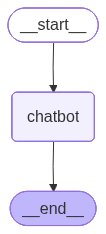

In [ ]:
#Visualize the graph
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", 'q']:
    print("Good Bye!")
    break
  for event in graph.stream({"messages": ('user', user_input)}):
    # print(event.values())
    for value in event.values():
      # print(value["messages"][0].content)
      print("Assistant: ", value["messages"][0].content)

User: Heyy!
Assistant:  Hey! 👋 How’s it going today?
User: What is your name?
Assistant:  I’m ChatGPT, a large language model developed by OpenAI.
User: How old are you?
Assistant:  I don’t have an age in the way a person does—I'm a machine learning model. The version of GPT that powers me was released by OpenAI in 2023, so you could say that’s when I “came into existence.”
User: What will be advanced technology in  the year 2027?
Assistant:  ### A “What‑If” Snapshot of 2027: Where Technology Might Be

Below is a mix of **high‑confidence trends** (things that are already on the horizon and likely to reach maturity) and **mid‑to‑high‑risk bets** (technologies that could leap forward if research, policy, and investment align).  It’s not a crystal ball, but it’s grounded in the trajectory of today’s R&D, funding pipelines, and the pace of commercialization.

| Domain | Likely 2027 State | What’s Driving It | Key Risks / Unknowns |
|--------|------------------|-------------------|---------